# MACHINE LEARNING OVERVIEW

## Đề Bài

1. Thực hiện Ordinal Encoding dựa trên thư viện của sklearn trên cột dữ liệu ordinal và huấn luyện lại mô hình Linear Regression.
2. Thực hiện One-Hot Encoding cho cả bộ dữ liệu giá và huấn luyện lại mô hình Lasso, Ridge với tham số phù hợp.
3. Kiểm tra thử xem các trường dữ liệu khác còn nhiễu không, tiến hành lọc nhiễu và huấn luyện lại mô hình ElasticNet.
4. Giải thích sự khác nhau và ý nghĩa trong công thức của Lasso, Ridge và ElasticNet.
5. Áp dụng thử KNeighborsRegressor của sklearn cho dữ liệu giá nhà và so sánh performance với các mô hình Linear Regression, Lasso, Ridge, ElasticNet.
6. Tiến hành phân tích mô tả cho dữ liệu bank_data.
7. Tìm hiểu ý nghĩa và thay đổi một số metrics như weights, algorithm, leafsize,… và hệ số n_neighbors phù hợp của mô hình kNN, so sánh performance.

## Bài Làm

In [61]:
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.model_selection as model_selection

from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [62]:
warnings.filterwarnings('ignore', category=FutureWarning)

In [63]:
df = pd.read_csv('data/house_price.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [64]:
df = df.drop(['Id'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [65]:
# Define a function to check for missing data in a DataFrame
def check_nan_df(df):
    miss = df.isna().sum()
    miss = miss[miss > 0]
    print(f'''Danh sách các cột thiếu dữ liệu:
{miss}

Số lượng cột có dữ liệu thiếu: {len(miss)}''')
    return miss

In [66]:
# Function to train a model, print the R^2 score, and plot true vs predicted values
def train_model(X, y, model):
    model.fit(X, y)
    score = model.score(X, y)
    pred = model.predict(X)
    print(f'Train score: {score:.4f}')
    pd.DataFrame({'True values': y, 'Predicted values': pred}).plot.scatter(x='True values', y='Predicted values')
    
    return model, score

In [67]:
miss = check_nan_df(df)

Danh sách các cột thiếu dữ liệu:
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Số lượng cột có dữ liệu thiếu: 19


In [68]:
ORDINAL_COLS = ['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual', 'BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageFinish']

In [69]:
df.drop(columns=list(miss[miss > len(df) // 2].index), inplace=True)
miss = check_nan_df(df)

Danh sách các cột thiếu dữ liệu:
LotFrontage     259
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

Số lượng cột có dữ liệu thiếu: 14


In [70]:
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].median(), inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace=True)

miss = check_nan_df(df)

Danh sách các cột thiếu dữ liệu:
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

Số lượng cột có dữ liệu thiếu: 11


In [71]:
for item in miss.index:
    if df[item].dtype == 'object':
        df[item].mask(df[item].isna(), 'NA', inplace=True)
        print(f'{item} (kiểu loại): đã điền giá trị NA cho dữ liệu thiếu.')
    else:
        df[item].mask(df[item].isna(), 0, inplace=True)
        print(f'{item} (kiểu số): đã điền giá trị 0 cho dữ liệu thiếu.')

BsmtQual (kiểu loại): đã điền giá trị NA cho dữ liệu thiếu.
BsmtCond (kiểu loại): đã điền giá trị NA cho dữ liệu thiếu.
BsmtExposure (kiểu loại): đã điền giá trị NA cho dữ liệu thiếu.
BsmtFinType1 (kiểu loại): đã điền giá trị NA cho dữ liệu thiếu.
BsmtFinType2 (kiểu loại): đã điền giá trị NA cho dữ liệu thiếu.
Electrical (kiểu loại): đã điền giá trị NA cho dữ liệu thiếu.
FireplaceQu (kiểu loại): đã điền giá trị NA cho dữ liệu thiếu.
GarageType (kiểu loại): đã điền giá trị NA cho dữ liệu thiếu.
GarageFinish (kiểu loại): đã điền giá trị NA cho dữ liệu thiếu.
GarageQual (kiểu loại): đã điền giá trị NA cho dữ liệu thiếu.
GarageCond (kiểu loại): đã điền giá trị NA cho dữ liệu thiếu.


In [72]:
miss = check_nan_df(df)

Danh sách các cột thiếu dữ liệu:
Series([], dtype: int64)

Số lượng cột có dữ liệu thiếu: 0


### Bài 1

In [73]:
df_simple = df.copy()
df_simple.shape

(1460, 75)

In [74]:
ordinal_columns_present = [col for col in ORDINAL_COLS if col in df.columns]
df[ordinal_columns_present] = OrdinalEncoder().fit_transform(df[ordinal_columns_present].astype(str))
df_simple.shape

(1460, 75)

In [75]:
for item in df.select_dtypes(include=['object']).columns:
    num_unique_values = df_simple[item].nunique()

    if num_unique_values > 2:
        df_simple[item] = LabelEncoder().fit_transform(df_simple[item])
        print(f'Label Encoder: {item}')
    else:
        ohe = OneHotEncoder()
        df_simple = pd.concat([df_simple, pd.DataFrame(ohe.fit_transform(df_simple[[item]]).toarray(), columns=[f'{item}_{feature}' for feature in ohe.get_feature_names_out()])], axis=1)
        df_simple.drop(item, axis=1, inplace=True)
        print(f'One-Hot Encoder: {item}')

df_simple.shape

Label Encoder: MSZoning
One-Hot Encoder: Street
Label Encoder: LotShape
Label Encoder: LandContour
One-Hot Encoder: Utilities
Label Encoder: LotConfig
Label Encoder: LandSlope
Label Encoder: Neighborhood
Label Encoder: Condition1
Label Encoder: Condition2
Label Encoder: BldgType
Label Encoder: HouseStyle
Label Encoder: RoofStyle
Label Encoder: RoofMatl
Label Encoder: Exterior1st
Label Encoder: Exterior2nd
Label Encoder: Foundation
Label Encoder: Heating
One-Hot Encoder: CentralAir
Label Encoder: Electrical
Label Encoder: Functional
Label Encoder: GarageType
Label Encoder: PavedDrive
Label Encoder: SaleType
Label Encoder: SaleCondition


(1460, 78)

In [76]:
df_simple = df_simple.dropna()
df_simple.shape

(1460, 78)

In [77]:
df_simple = pd.get_dummies(df_simple)
df_simple.shape

(1460, 134)

Train score: 0.8694
Test score: 0.8166


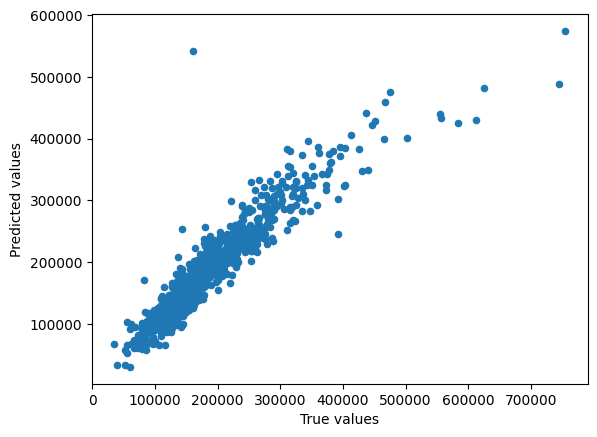

In [78]:
X = df_simple.drop(['SalePrice'], axis=1).to_numpy()
y = df_simple['SalePrice'].to_numpy()

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=99)

linear_regression = LinearRegression()
linear_regression, train_score = train_model(X_train, y_train, linear_regression)
print(f'Test score: {linear_regression.score(X_test, y_test):.4f}')

### Bài 2

In [79]:
df_simple = df.copy()

In [80]:
for item in df.select_dtypes(include=['object']).columns:
    ohe = OneHotEncoder()
    df_simple = pd.concat([df_simple, pd.DataFrame(ohe.fit_transform(df_simple[[item]]).toarray(), columns=[f'{item}_{feature}' for feature in ohe.get_feature_names_out()])], axis=1)
    df_simple.drop(item, axis=1, inplace=True)
    print(f'One-Hot Encoder: {item}')

One-Hot Encoder: MSZoning
One-Hot Encoder: Street
One-Hot Encoder: LotShape
One-Hot Encoder: LandContour
One-Hot Encoder: Utilities
One-Hot Encoder: LotConfig
One-Hot Encoder: LandSlope
One-Hot Encoder: Neighborhood
One-Hot Encoder: Condition1
One-Hot Encoder: Condition2
One-Hot Encoder: BldgType
One-Hot Encoder: HouseStyle
One-Hot Encoder: RoofStyle
One-Hot Encoder: RoofMatl
One-Hot Encoder: Exterior1st
One-Hot Encoder: Exterior2nd
One-Hot Encoder: Foundation
One-Hot Encoder: Heating
One-Hot Encoder: CentralAir
One-Hot Encoder: Electrical
One-Hot Encoder: Functional
One-Hot Encoder: GarageType
One-Hot Encoder: PavedDrive
One-Hot Encoder: SaleType
One-Hot Encoder: SaleCondition


In [81]:
df_simple = df_simple.dropna()

In [82]:
df_simple = pd.get_dummies(df_simple)
df_simple.shape

(1460, 227)

In [83]:
X = df_simple.drop(['SalePrice'], axis=1).to_numpy()
y = df_simple['SalePrice'].to_numpy()

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=99)

In [84]:
grid_search = GridSearchCV(Lasso(), {'alpha': [1, .1, .01, .001, .0001]}, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')
print(f'Test score of the best model: {grid_search.best_estimator_.score(X_test, y_test)}')

c:\Users\yamia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.678e+11, tolerance: 5.546e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\yamia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.769e+11, tolerance: 5.518e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\yamia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

c:\Users\yamia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.811e+11, tolerance: 5.518e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\yamia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.566e+11, tolerance: 4.904e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\yamia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

Best parameters: {'alpha': 1}
Best score: 0.7750988755368188
Test score of the best model: 0.8165080008141468


c:\Users\yamia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.624e+11, tolerance: 5.486e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\yamia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.194e+11, tolerance: 6.750e+08
  model = cd_fast.enet_coordinate_descent(


In [85]:
grid_search = GridSearchCV(Ridge(), {'alpha': [1, .1, .01, .001, .0001]}, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')
print(f'Test score of the best model: {grid_search.best_estimator_.score(X_test, y_test)}')

Best parameters: {'alpha': 0.1}
Best score: 0.7697827781711584
Test score of the best model: 0.8208018734162745


### Bài 3

In [86]:
df_simple = df.copy()

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

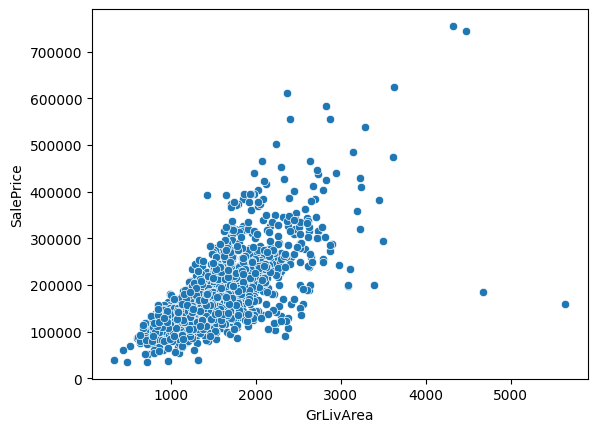

In [87]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_simple)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

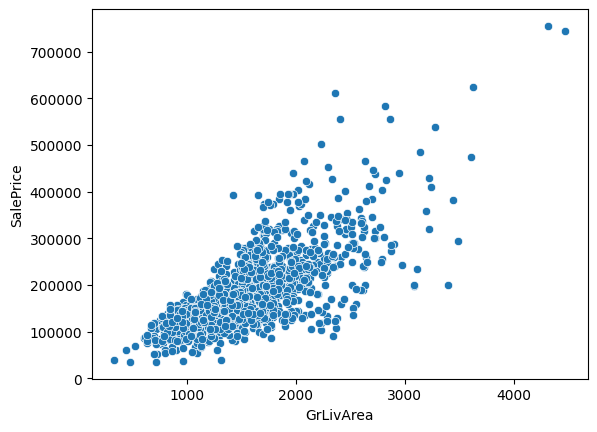

In [88]:
df_simple = df_simple.drop(df_simple[df_simple['GrLivArea'] > 4500].index, axis=0)

sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_simple)

In [89]:
df_simple['GrLivArea'].skew()

1.0109917025385513

<Axes: xlabel='LotArea', ylabel='SalePrice'>

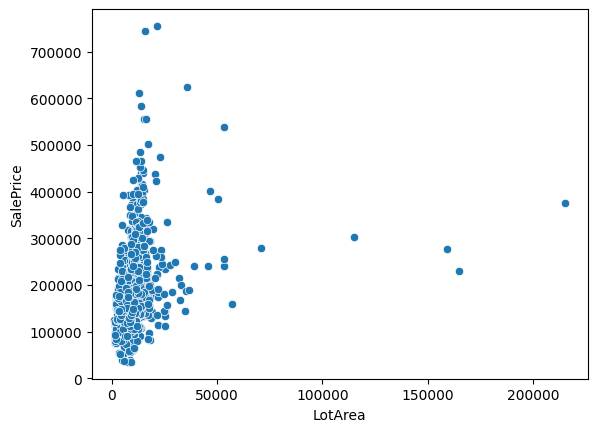

In [90]:
sns.scatterplot(x='LotArea', y='SalePrice', data=df_simple)

<Axes: xlabel='LotArea', ylabel='SalePrice'>

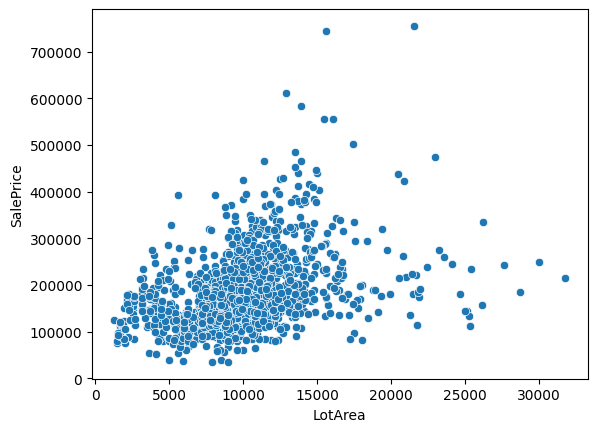

In [91]:
df_simple = df_simple.drop(df_simple[df_simple['LotArea'] > 32000].index, axis=0)

sns.scatterplot(x='LotArea', y='SalePrice', data=df_simple)

In [92]:
df_simple['LotArea'].skew()

1.0102717519582496

In [93]:
df_simple = pd.get_dummies(df_simple)
df_simple.shape

(1439, 225)

In [94]:
X = df_simple.drop(['SalePrice'], axis=1).to_numpy()
y = df_simple['SalePrice'].to_numpy()

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=99)

In [95]:
grid_search = GridSearchCV(ElasticNet(), {'alpha': [1, .1, .01, .001, .0001], 'l1_ratio': np.linspace(0, 1, 11)[1:-1]}, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')
print(f'Test score of the best model: {grid_search.best_estimator_.score(X_test, y_test)}')

c:\Users\yamia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.832e+11, tolerance: 4.435e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\yamia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.048e+11, tolerance: 4.517e+08
  model = cd_fast.enet_coordinate_descent(
c:\Users\yamia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

Best parameters: {'alpha': 0.1, 'l1_ratio': 0.8}
Best score: 0.9022095325649063
Test score of the best model: 0.8724738296983889


### Bài 4

Lasso Regression (L1 regularization): Tương tự như Ridge nhưng sử dụng tổng giá trị tuyệt đối của các hệ số làm số hạng được thêm vào. Lasso có thể dẫn đến việc một số hệ số bị thu nhỏ về 0, giúp lựa chọn các biến quan trọng và loại bỏ các biến không cần thiết, làm mô hình đơn giản và dễ hiểu hơn.

Ridge Regression (L2 regularization): Thêm vào hàm mất mát một số hạng là bình phương của các hệ số (trừ hệ số tự do). Mục tiêu là giảm thiểu độ phức tạp của mô hình bằng cách giảm thiểu độ lớn của các hệ số, giúp mô hình ít bị ảnh hưởng bởi sự cộng hưởng của dữ liệu (overfitting).

ElasticNet Regression: Kết hợp giữa L1 và L2 regularization, thêm vào hàm mất mát cả hai số hạng của Ridge và Lasso. Điều này cho phép mô hình hóa linh hoạt hơn, kết hợp lợi ích của cả việc giảm thiểu độ lớn của các hệ số (giống như Ridge) và lựa chọn biến (giống như Lasso). ElasticNet thích hợp khi có nhiều biến tương quan với nhau.

Ridge và Lasso có thể coi là trường hợp đặc biệt của ElasticNet với các tham số điều chỉnh phù hợp.

### Bài 5

In [96]:
df_simple = df.copy()
df_simple.shape

(1460, 75)

In [97]:
ordinal_columns_present = [col for col in ORDINAL_COLS if col in df.columns]
df[ordinal_columns_present] = OrdinalEncoder().fit_transform(df[ordinal_columns_present].astype(str))
df_simple.shape

(1460, 75)

In [98]:
for item in df.select_dtypes(include=['object']).columns:
    num_unique_values = df_simple[item].nunique()

    if num_unique_values > 2:
        df_simple[item] = LabelEncoder().fit_transform(df_simple[item])
        print(f'Label Encoder: {item}')
    else:
        ohe = OneHotEncoder()
        df_simple = pd.concat([df_simple, pd.DataFrame(ohe.fit_transform(df_simple[[item]]).toarray(), columns=[f'{item}_{feature}' for feature in ohe.get_feature_names_out()])], axis=1)
        df_simple.drop(item, axis=1, inplace=True)
        print(f'One-Hot Encoder: {item}')

df_simple.shape

Label Encoder: MSZoning
One-Hot Encoder: Street
Label Encoder: LotShape
Label Encoder: LandContour
One-Hot Encoder: Utilities
Label Encoder: LotConfig
Label Encoder: LandSlope
Label Encoder: Neighborhood
Label Encoder: Condition1
Label Encoder: Condition2
Label Encoder: BldgType
Label Encoder: HouseStyle
Label Encoder: RoofStyle
Label Encoder: RoofMatl
Label Encoder: Exterior1st
Label Encoder: Exterior2nd
Label Encoder: Foundation
Label Encoder: Heating
One-Hot Encoder: CentralAir
Label Encoder: Electrical
Label Encoder: Functional
Label Encoder: GarageType
Label Encoder: PavedDrive
Label Encoder: SaleType
Label Encoder: SaleCondition


(1460, 78)

In [99]:
df_simple = df_simple.dropna()
df_simple.shape

(1460, 78)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

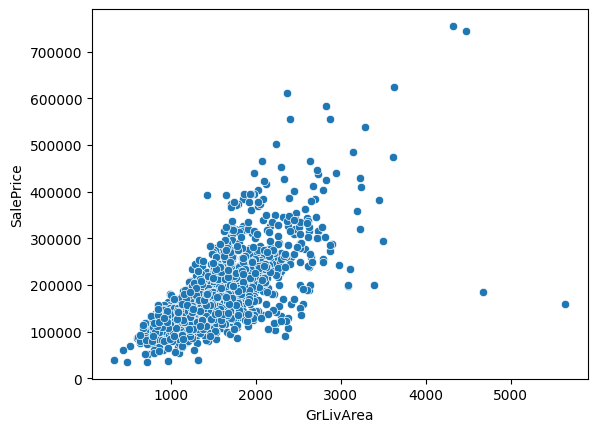

In [100]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_simple)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

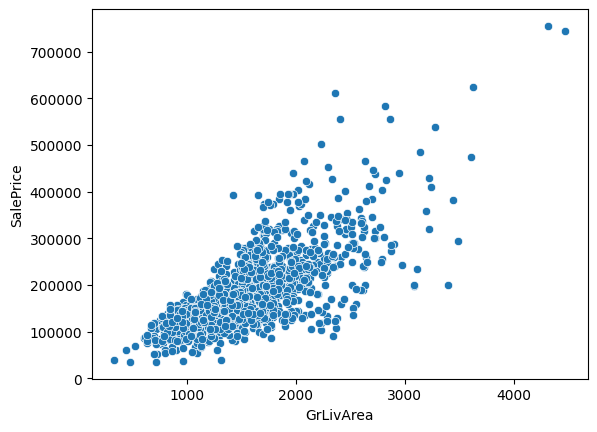

In [101]:
df_simple = df_simple.drop(df_simple[df_simple['GrLivArea'] > 4500].index, axis=0)

sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_simple)

In [102]:
df_simple['GrLivArea'].skew()

1.0109917025385513

<Axes: xlabel='LotArea', ylabel='SalePrice'>

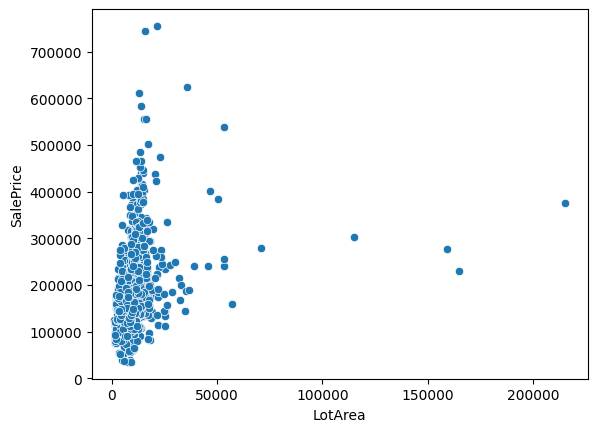

In [103]:
sns.scatterplot(x='LotArea', y='SalePrice', data=df_simple)

<Axes: xlabel='LotArea', ylabel='SalePrice'>

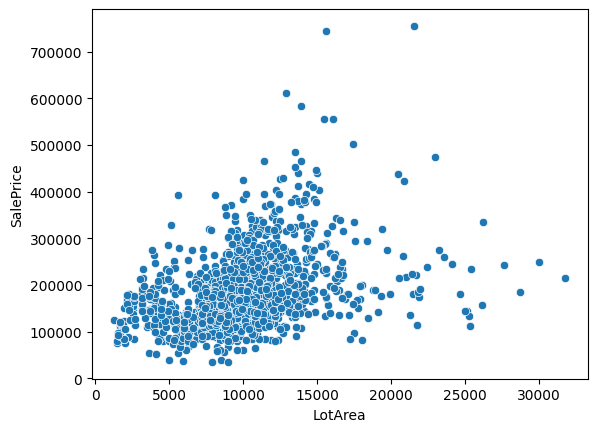

In [104]:
df_simple = df_simple.drop(df_simple[df_simple['LotArea'] > 32000].index, axis=0)

sns.scatterplot(x='LotArea', y='SalePrice', data=df_simple)

In [105]:
df_simple['LotArea'].skew()

1.0102717519582496

In [106]:
df_simple = pd.get_dummies(df_simple)
df_simple.shape

(1439, 78)

Train score: 0.1877
Test score: 0.0116


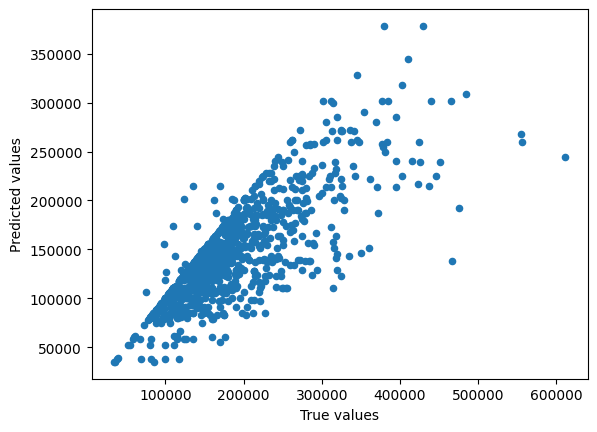

In [107]:
X = df_simple.drop(['SalePrice'], axis=1)
y = df_simple['SalePrice']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=99)
knn = KNeighborsClassifier()
knn, train_score = train_model(X_train, y_train, knn)
print(f'Test score: {knn.score(X_test, y_test):.4f}')